In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
lineW = 3
lineBoxW=2

font = {'family' : 'normal',
        'weight' : 'normal',#'bold',
        'size'   : 24}

plt.rc('font', **font)
plt.rcParams['text.usetex'] = True

## Nonlinear Oscillator

$\ddot x + \omega^2 x +{x^3}=F(t)$ 

In [3]:
def f(u, t ,lam=0,A=0,W=1,gamma=0, w=1):
    x,  px = u      # unpack current values of u
    derivs = [px,-gamma*px -w**2*x - lam*x**3 +A*np.sin(W*t)]     # you write the derivative here
    return derivs
# Scipy Solver   
def NLosc_solution(t, x0,  px0, lam=1, A=0,W=1,gamma=0,w=1):
    u0 = [x0, px0]
    # Call the ODE solver
    solPend = odeint(f, u0, t, args=(lam,A,W,gamma,w))
    xP = solPend[:,0];        pxP = solPend[:,1];   
    return xP, pxP

In [4]:
Nt=500
t = np.linspace(0,4*np.pi,Nt)
x0, v0 = 1.3, 1

x,v  = NLosc_solution(t,x0,v0) 

Text(0, 0.5, '$v$')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


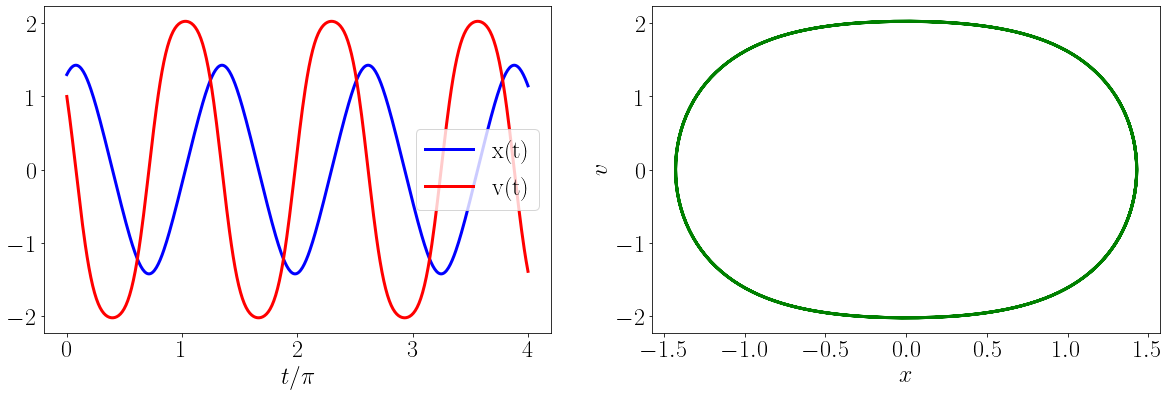

In [5]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
plt.plot(t/np.pi,x,'b',label='x(t)', linewidth = lineW)
plt.plot(t/np.pi,v,'r',label='v(t)', linewidth = lineW)
plt.xlabel('$t/\pi$')
plt.legend()
plt.subplot(1,2,2)
plt.plot(x,v,'g', linewidth = lineW)
plt.xlabel('$x$')
plt.ylabel('$v$')

## Pendulum

$\ddot x + \sin x =F(t)$ 

In [6]:
def f(u, t ,lam=0,A=0,W=1,gamma=0, w=1):
    x,  px = u      # unpack current values of u
    derivs = [px,-gamma*px -np.sin(x) + A*np.sin(W*t)]     # you write the derivative here
    return derivs
# Scipy Solver   
def pendulum_solution(t, x0,  px0, lam=1, A=0, W=1):
    u0 = [x0, px0]
    # Call the ODE solver
    solPend = odeint(f, u0, t, args=(lam,A,W))
    xP = solPend[:,0];        pxP = solPend[:,1];   
    return xP, pxP

In [7]:
Nt=5000
t = np.linspace(0,100*np.pi,Nt)
x0, v0 = .5, .5

x,v  = pendulum_solution(t,x0,v0,A=.5, W=.2) 

Text(0, 0.5, '$v$')

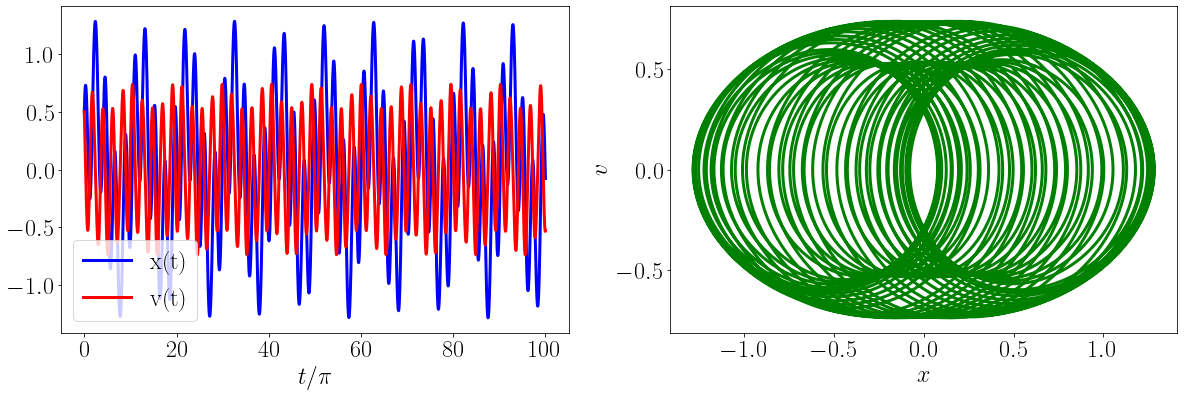

In [8]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
plt.plot(t/np.pi,x,'b',label='x(t)', linewidth = lineW)
plt.plot(t/np.pi,v,'r',label='v(t)', linewidth = lineW)
plt.xlabel('$t/\pi$')
plt.legend()
plt.subplot(1,2,2)
plt.plot(x,v,'g', linewidth = lineW)
plt.xlabel('$x$')
plt.ylabel('$v$')

## Henon Heiles

In [9]:
# Use below in the Scipy Solver   
def f(u, t ,lam=1):
    x, y, px, py = u      # unpack current values of u
    derivs = [px, py, -x -2*lam*x*y, -y -lam*(x**2-y**2) ]     # list of dy/dt=f functions
    return derivs

# Scipy Solver   
def HHsolution(N,t, x0, y0, px0, py0,lam=1):
    u0 = [x0, y0, px0, py0]
    # Call the ODE solver
    solPend = odeint(f, u0, t, args=(lam,))
    xP = solPend[:,0];    yP  = solPend[:,1];
    pxP = solPend[:,2];   pyP = solPend[:,3]
    return xP,yP, pxP, pyP


In [10]:
Nt=500
t = np.linspace(0,20*np.pi,Nt)

x0, y0, px0, py0, lam =  0.3,-0.3, 0.3, 0.15, 1; 

x0, y0, px0, py0, lam =  0.5,-0.3, 0.3, 0.2, 1; 



x, y, px, py = HHsolution(Nt,t, x0, y0, px0, py0, lam)


Text(0, 0.5, '$px$')

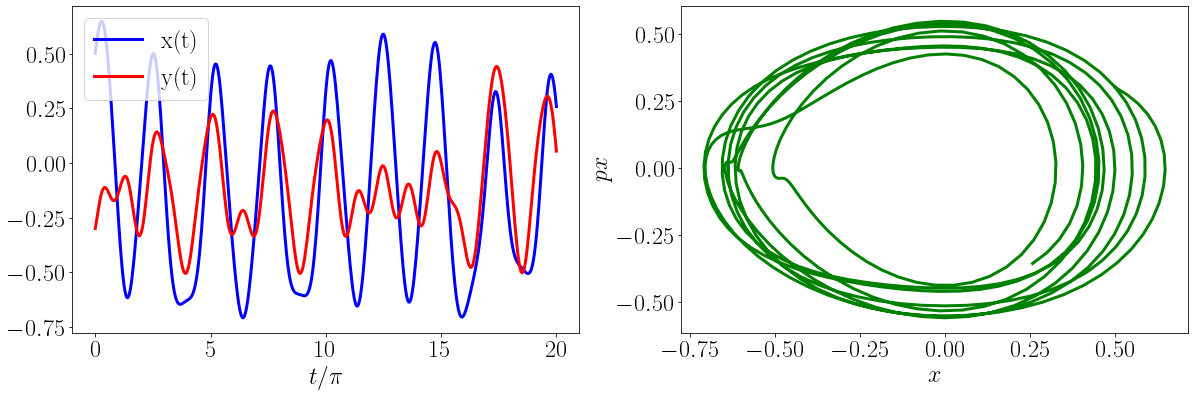

In [11]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
plt.plot(t/np.pi,x,'b',label='x(t)', linewidth = lineW)
plt.plot(t/np.pi,y,'r',label='y(t)', linewidth = lineW)
plt.xlabel('$t/\pi$')
plt.legend()
plt.subplot(1,2,2)
plt.plot(x,px,'g', linewidth = lineW)
plt.xlabel('$x$')
plt.ylabel('$px$')